In [6]:
import ir_datasets
import pandas as pd
import json

In [10]:
table = []
with open('metadata_processed.jsonl', 'r') as file:
    for line in file.readlines():
        line = json.loads(line)
        try:
            table.append((line["tripclick_id"], line["year"]))
        except:
            print(line)

{'paperId': '01bff1b524c1970d9f30a232a6521eb38ed2f1e2', 'title': 'Potential impact of noncontrast computed tomography as gatekeeper for myocardial perfusion positron emission tomography in patients admitted to the chest pain unit.', 'tripclick_id': '674621'}
{'paperId': '51a62e2bafdb828f76b23c3a33a93fabcad696c6', 'title': 'Alcohol and long-term prognosis after a first acute myocardial infarction: the SHEEP study.', 'tripclick_id': '674623'}
{'paperId': '9d9930c95c0aa0a7c9c5b90acbdd6c7ed628dfe4', 'title': "Are surgeons' preferences for instrumentation related to patient outcomes? A randomized clinical trial of two implants for idiopathic scoliosis.", 'tripclick_id': '674631'}
{'paperId': 'ad26ed0461fbf9be850a789916815d401fb8e59c', 'title': 'Chewing Problems and Mortality in Older Adults in Home Care: Results from the Aged in Home Care Study', 'tripclick_id': '674634'}
{'paperId': '58da85f636d0f396502f6fc65e75f6fe96876cb9', 'title': 'Integrated breathing and relaxation training (the Papw

In [20]:
data = pd.DataFrame(table, columns=["tripclick_id", "year"])

In [68]:
data["sub-collection"] = pd.qcut(data["year"], 3, labels=["t1", "t2", "t3"])#.value_counts()

In [75]:
patch_dict=data.set_index("tripclick_id")["sub-collection"].to_dict()

In [76]:
with open("tripclick-subcollections.json", "w") as file:
    json.dump(patch_dict, file)

In [59]:
len(data["year"].dropna())-1524989  # missing

-14246

<Axes: title={'center': 'TripClick: Number of publications per year'}, xlabel='year'>

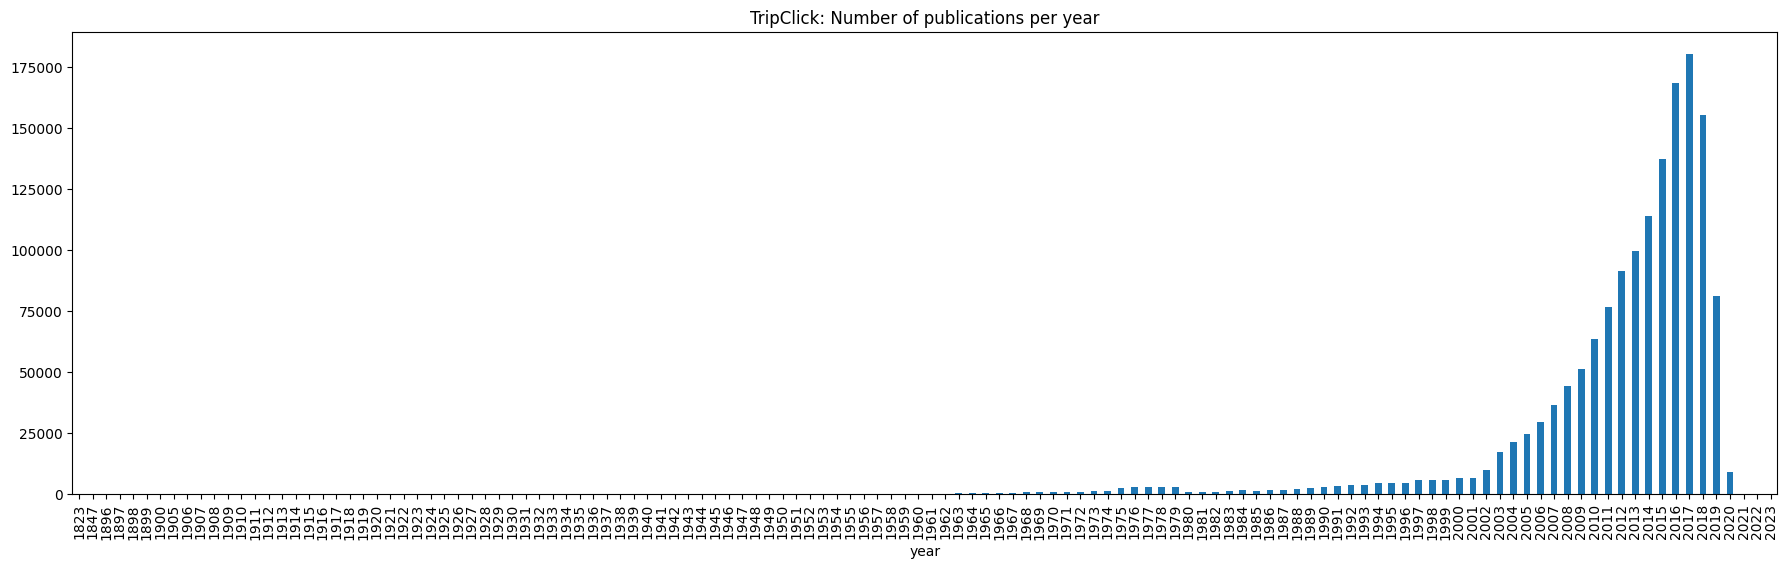

In [53]:
years = data["year"].dropna().apply(lambda x: int(x))
years.value_counts().sort_index().plot(kind="bar", figsize=(22, 6), title="TripClick: Number of publications per year")